# Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1.1 Load Data

In [6]:
df = pd.read_csv("train.csv")
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,Spondylolisthesis
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,Hernia
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Spondylolisthesis
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal


# 1.2 Express Class Numerically

In [7]:
# turn class into a numerical column
def turn_to_number(x, label, num):
    if x == label:
        return num
    else:
        return x
    

for num, label in enumerate(df["class"].unique()):
    df["class"] = df["class"].map(lambda x: turn_to_number(x, label, num))
    
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,0
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,1
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,2


# 2.1 Explore Distributions

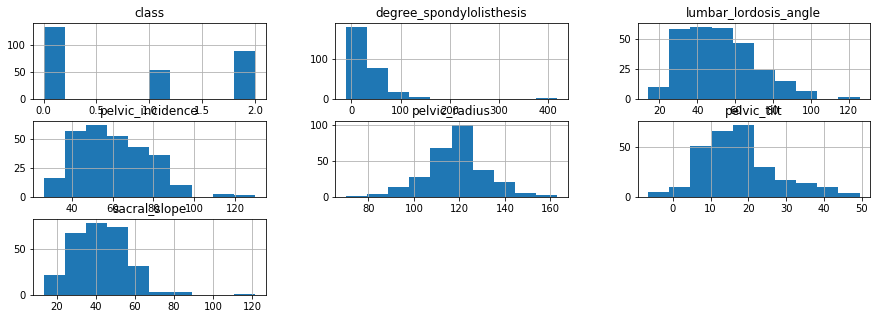

In [9]:
df.hist(figsize=(15, 5));

It Appears lumbar_lordosis_angle and degree spondylolisthesis are skewed.

# 3.1 Explore Bivariate Relationships

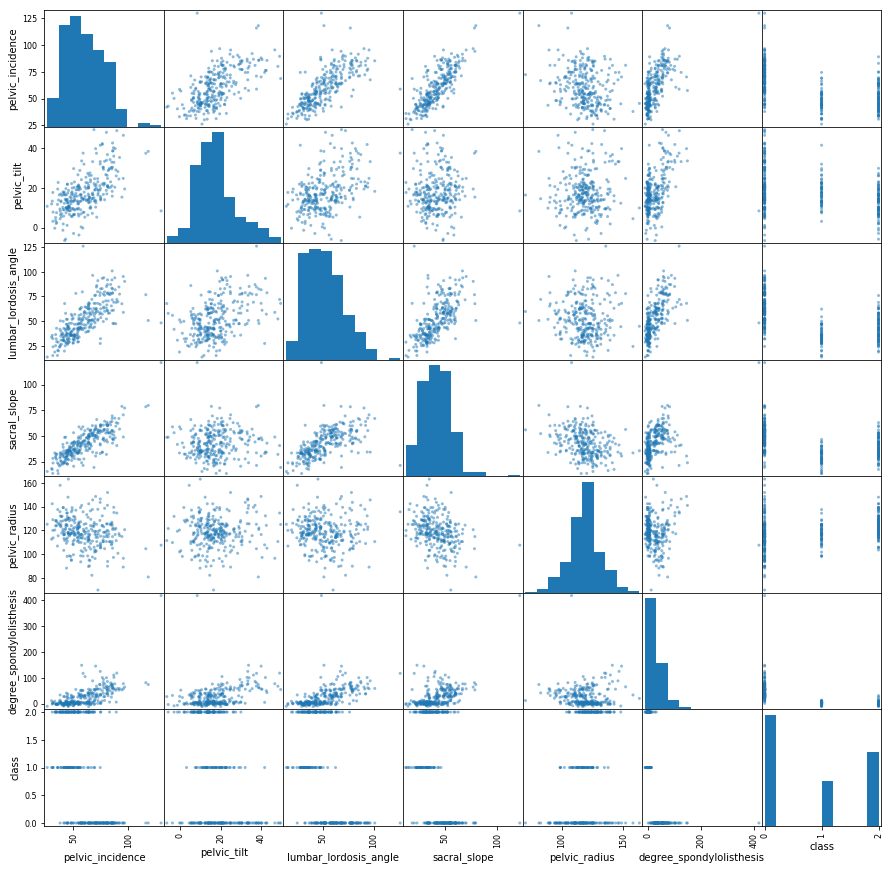

In [15]:
# plot a scatter plot for every combination of variables
pd.plotting.scatter_matrix(df, figsize=(15, 15));

Many of the variables share linear relationships. This can cause colinearity.

# 3.2 Explore Multicolinearity

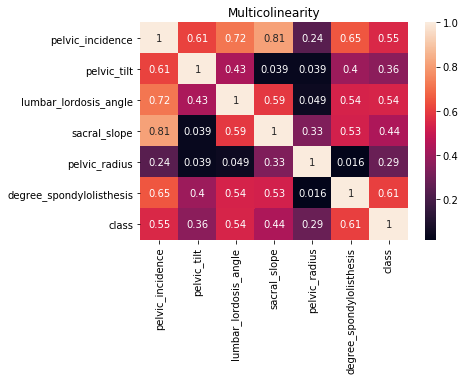

In [18]:
# plot heatmap of correlation
plt.figsize=(15, 15)
sns.heatmap(abs(df.corr()), annot=True)
plt.title("Multicolinearity")
plt.show()

# 4.1 Multivariate Relationships

C:\Users\zasz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\zasz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1080x360 with 0 Axes>

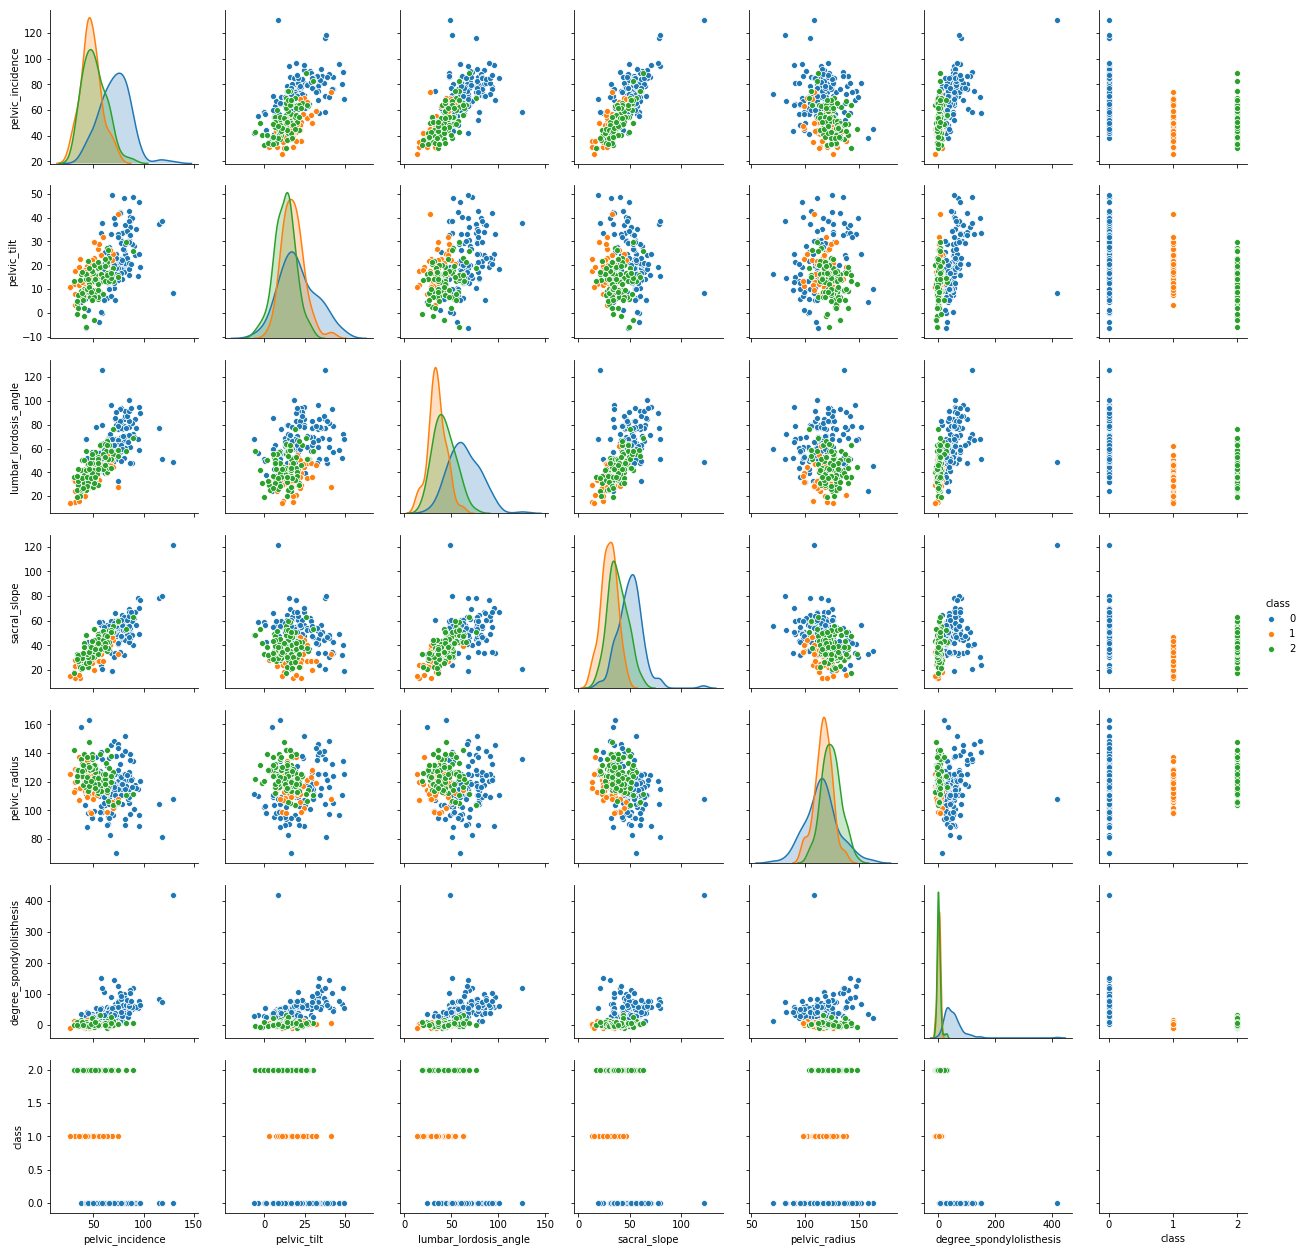

In [20]:
# plot relationships between variables and examine for differences in class
plt.figure(figsize=(15, 5))
sns.pairplot(df, hue="class")
plt.show()

From What I see in this graph, there are no easily found relationships involving 3 variables.